# Розрахунок рупорно-лінзової антени з металодіелектричною лінзою
1) І.П. Заїкін, О.О. Зеленський, О.В. Тоцький, С.К. Абрамов, Антенні пристрої засобів зв’язку, 2009, СС. 156 – 200.  
2) И.П. Заикин, А.В. Тоцкий, С.К. Абрамов, Проектирование антенных устройств систем связи, 2007, СС. 3 – 35. 


Вихідні дані:  

- Напруженість поля $ E = 2 $ мВ/м;  
- Потужність передавача $ P = 3.5 $ кВт;  
- Середня довжина робочої хвилі $ \lambda_0 = 6 * 10^{-2} $ м;  
- Висота передавальної та приймальної антени відповідно $ h_1 = h_2 = 50 $ м;  
- Довжина ретрансляційної ділянки $R  = 50 $ км;  
- Частотна смуга $ \frac{2Δf}{f_0} = 10\% $;  
- Вертикальна поляризація

За результатами розрахунків у розрахунково-пояснювальній записці має бути представлено таке:
- графіки нормованих діаграм спрямованості антени в площинах Е та Н з визначенням ширини головної пелюстки та рівня бокових пелюсток;
- креслення конструкції антени у відповідному масштабі;
- креслення конструкції хвилеводно-коаксіального переходу.


## Розрахунок за пуктами

### Ініціалізація

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c as light_speed

Задаємо змінні

In [36]:
E = 2 # Напруженість поля E, мВ/м
P = 3.5 # Потужність передавача Р, кВт
wavelength_0 = 6e-2 # Середня довжина робочої хвилі λ_0, м

h1 = 50 # висота передавальної та приймальної антени, м
R = 50 # довжина ретрансляційної ділянки, км
Chas_smug = 0.1 # частотна смуга 2Δf/f0 = 10%

### Пункт 1

Коефіцієнт спрямованої дії виведений з формули Введенського:
$$  D_m = \frac{E^2 R^4 \lambda^2}{(2.18)^2 P (h')^4} $$

In [37]:
h_1 = h1 - (R**2 / 51.2) # зведена висота антени
Dm = (E**2 * R**4 * wavelength_0**2) / (2.18**2 * P * h_1**4) # КСД
print(f"КСД = {round(Dm)}")

КСД = 2869


Знаходимо геометричну площу розкриву  
- КВП антени у межах $ v_{a} = 0.5  ...  0.6 $.

In [38]:
va = 0.5 # задаємо КВП = 0.5
# Sp = (wavelength_0**2 / (4 * np.pi)) * (Dm / va)
Sp = (wavelength_0**2 * Dm) / (4 * np.pi * va)
print (f"Геометрична площа розкриву = {Sp:.4} м²")

Геометрична площа розкриву = 1.644 м²


### Пункти 2 - 5

Визначаємо розміри розкриву лінзи $ d_{pE} $ i $ d_{pH} $ враховуюючи що ми очікуємо ДС голчастого типу.   
Задаємо фокусну відстань такою, що дорівнює більшому розміру розкриву.

In [39]:
d_pH = np.sqrt(Sp * 1.34) # розмір розкриву лінзи у площі H
d_pE = np.sqrt(Sp / 1.34) # розмір розкриву лінзи у площі E
focus = d_pH # фокусна відстань
print(f"d_pH = {round(d_pH, 2)} м \nd_pE = {round(d_pE, 2)} м")

d_pH = 1.48 м 
d_pE = 1.11 м


Вибираємо коефіцієнт заломлення у межах $ n = 1.3 ... 1.6 $  
Задаючись значенням $ y = 0...d_{pE}/2 $ i $ x = 0...d_{pH}/2 $ обчислюємо й будуємо профілі лінзи у площинах E і H

In [40]:
n = 1.3  # Коефіцієнт заломлення

##### Профіль лінзи у площині E

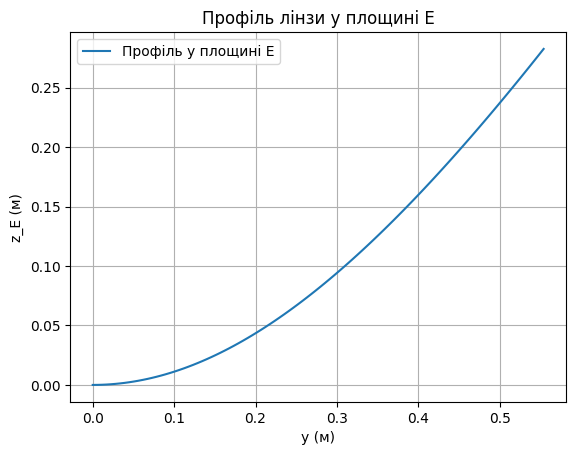

In [41]:
y_values = np.linspace(0, d_pE/2, 100)  # Значення y від 0 до d_pE / 2
z_E_values = - focus / (n + 1) + np.sqrt((focus / (n + 1))**2 + y_values**2 / (n**2 - 1))

plt.figure()
plt.plot(y_values, z_E_values, label='Профіль у площині E')
plt.xlabel('y (м)')
plt.ylabel('z_E (м)')
plt.title('Профіль лінзи у площині E')
plt.grid(True)
plt.legend()
plt.show()


##### Профіль лінзи у площині Н

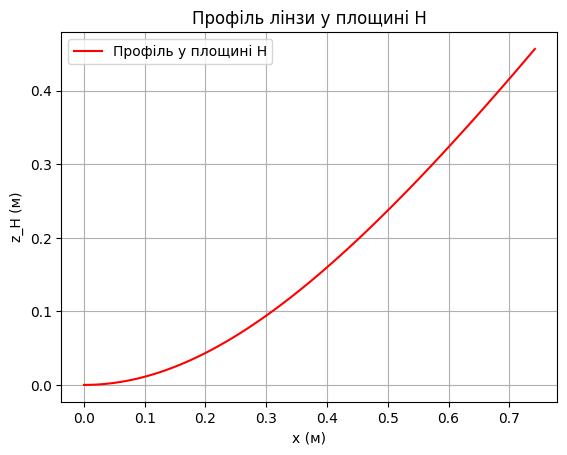

In [42]:
x_values = np.linspace(0, d_pH / 2, 100)  # Значення x від 0 до d_pH / 2
z_H_values = - focus / (n + 1) + np.sqrt((focus / (n + 1))**2 + x_values**2 / (n**2 - 1))

plt.figure()
plt.plot(x_values, z_H_values, label='Профіль у площині H', color='red')
plt.xlabel('x (м)')
plt.ylabel('z_H (м)')
plt.title('Профіль лінзи у площині H')
plt.grid(True)
plt.legend()
plt.show()

### Пункт 6  
Знаходимо значення товщини лінзи у площині E

In [43]:
mn1 = focus / (n+1)
mn2 = d_pE / (4 * (n**2 - 1))

t_E = - mn1 + np.sqrt(mn1**2 + mn2)
print(f"Товщина лінзи у площині Е = {round(t_E, 2)} м")

Товщина лінзи у площині Е = 0.26 м


Знаходимо значення товщини лінзи у площині Н

In [44]:
mn2 = d_pH / (4 * (n**2 - 1))

t_H = - mn1 + np.sqrt(mn1**2 + mn2)
print(f"Товщина лінзи у площині H = {round(t_H, 2)} м")

Товщина лінзи у площині H = 0.33 м


### Пункт 7  
Розраховуємо половини кутів розкривів лінзи $ \phi_{0H} $ та $ \phi_{0E} $

In [45]:
phi_0H = np.arctan(d_pH / (2 * focus + 2 * t_H)) # половиниа кута розкриву лінзи у плошині H
phi_0E = np.arctan(d_pE / (2 * focus + 2 * t_E)) # половиниа кута розкриву лінзи у плошині E

# переводимо в кути
phi_0H = np.degrees(phi_0H)
phi_0E = np.degrees(phi_0E)

print(f"1/2 кута рокриву лінзи у площині Н = {np.round(phi_0H, 2)}\u00b0")
print(f"1/2 кута рокриву лінзи у площині E = {np.round(phi_0E, 2)}\u00b0")

1/2 кута рокриву лінзи у площині Н = 22.23°
1/2 кута рокриву лінзи у площині E = 17.62°


### Пункт 8
Для рупора, безпосередньо приєднаного до лінзи (власне РЛА) розміри розкриву оптимального рупора слід вважати такими, що дорівнюють розмірам розкриву коректуючої лінзи $ a_p = d_{pH},  b_p = d_{pE}, R_H = f = d_{pH} $

In [46]:
a_p = R_H = d_pH
b_p = d_pE

### Пункт 9


Визначаємо $ f_0 = \frac{c}{\lambda_0} $   
Визначаємо $ \Delta f = 0.1 * f_0 $ з частотної смуги $ \frac{2 \Delta f}{f_0} = 10\% $  
Визначаємо $ f_{min} $ та $ f_{max} $  

In [47]:
f_0 = light_speed / wavelength_0  # Середня частота

# Обчислення частотної смуги
delta_f = 0.05 * f_0  # Половина частотної смуги = 5% від середньої частоти
f_min = f_0 - delta_f  # Мінімальна частота
f_max = f_0 + delta_f  # Максимальна частота

print(f"Середня частота f_0 = {f_0 * 10**-9:.3} ГГц")
print(f"Частотна смуга Δf = {delta_f * 10**-9:.3} ГГц")

Середня частота f_0 = 5.0 ГГц
Частотна смуга Δf = 0.25 ГГц


Визначаємо мінімальну й максимальну довжину хвилі заданого діапазону

In [48]:
wavelength_min = light_speed / f_max
wavelength_max = light_speed / f_min

print(f"Максимальна довжина хвилі = {wavelength_max:.3} м або {wavelength_max*100:.3} см")
print(f"Мінімальна довжина хвилі = {wavelength_min:.3} м або {wavelength_min*100:.3} см")

Максимальна довжина хвилі = 0.0632 м або 6.32 см
Мінімальна довжина хвилі = 0.0571 м або 5.71 см


### Пункт 10
Вибираємо розмір смуг $l_E$ у діапазоні $ \frac{\lambda_{min}}{8} \le l_E \le \frac{\lambda_{min}}{4}$

In [49]:
l_min = wavelength_min / 8
l_max = wavelength_min / 4
l_E_array = np.linspace(l_min, l_max, num=100)  # num визначає кількість точок
l_E = min(l_E_array)

print(f"Розмір смуг = {l_E:.3} м або {l_E*1000:.2f} мм")

Розмір смуг = 0.00714 м або 7.14 мм


#### Пункт 11
За формулою $ N_a = \frac{4}{\pi l^2_E}(n^2-1) $ (10.43) визначаємо кількість смуг $ N_a $, які проходять через одиницю площі поздовжнього перерізу лінзи

In [50]:
N_a = (4 / (np.pi * l_E**2)) * (n**2 - 1)
print(f"Кількість смуг N_a = {N_a:.0f}")

Кількість смуг N_a = 17219


### Пункт 12
Вибираємо відстань між сусідніми смугами $d$ у межах $ 0.1 \lambda \le d \le 0.125 \lambda $

In [68]:
d_smug = 0.11 * wavelength_0
print(f"{d_smug:.2} м або {d_smug*1000:.1f} мм")

0.0066 м або 6.6 мм


#### Пункт 13
За формулою $ N_a = \frac{1}{bd} $ (10.44) обчислюємо відстань між серединами смуг $b$

In [69]:
b_smug = 1 / (N_a * d_smug)

print(f"{b_smug:.4f} м або {b_smug*1000:.1f} мм")

0.0088 м або 8.8 мм


### Пункт 14
Якщо товщина гладкої лінзи перевищує певну величину, тобто $ t_{гл} > 1.67 \lambda $ при $ n = 1.6$, $ t_{гл} > 2\lambda $ при $ n = 1.5 $, $ t_{гл} > 2.5\lambda $ при $ n = 1.4 $, $ t_{гл} > 3.3\lambda $ при $ n = 1.3 $ то проводимо її зонування за формулами:  
a) ширина сходинки $ t_1 = \frac{\lambda}{n - 1} $ (10.54)   
б) товщина лінзи  $ t_2 = t_1 + z_1 $ (10.55), де $z_1$ - величина стовщення лінзи, що вибирається з конструктивних міркувань  
в) загальна кількість зон $ m = 1 + \frac{(f_m - f)(n - 1)}{\lambda} $ (10.56), де  
$ f_m = \frac{ \frac{nf}{\sqrt{f^2 + ( \frac{d_p}{2} )^2}} - 1 }{n-1} \sqrt{(f+t_2)^2 + ( \frac{d_p}{2} )^2} $

In [53]:
if t_E > 3.3 * wavelength_0: print("Потрібне зонування в площині Е")
else: print("Не потрібне зонування в площині Е")

if t_H > 3.3 * wavelength_0: print("Потрібне зонування в площині H")
else: print("Не потрібне зонування в площині H")

Потрібне зонування в площині Е
Потрібне зонування в площині H


Зонування в площині Е

In [54]:
t_1 = wavelength_0 / (n - 1)
z_1 = 0.1 * t_1
t_2 = t_1 + z_1

mn1 = ((n * focus) / np.sqrt(focus**2 + (d_pE / 2)**2)) - 1
mn2 = np.sqrt((focus + t_2)**2 + (d_pE/2)**2)
f_mE = (mn1 / n - 1) * mn2

print(f"{f_mE}")

-1.491438471599461


In [55]:
mn1 = ((n * focus) / np.sqrt(focus**2 + (d_pH / 2)**2)) - 1
mn2 = np.sqrt((focus + t_2)**2 + (d_pH/2)**2)
f_mH = (mn1 / n - 1) * mn2

print(f"{f_mH}")

-1.6260196947716283
